# Week 5 Task

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import time

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from scipy import linalg

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200

#Useful for debugging problems
print(tf.__version__)

2.6.0


In [2]:
# Load MNIST dataset

mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((train_images.shape[0], 28,28,1))
test_images = test_images.reshape((test_images.shape[0], 28,28,1))

#Normalise pixel values

train_images=train_images/255.0
test_images=test_images/255.0


# Task 1.

Train a neural network on the MNIST training dataset that achieves acceptable performance on the test dataset (>95% accuracy)

Creating our model, define our input shape with 1 convolutional layer. Compile the model and then train it.

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# Training network
history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels), verbose=0)

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) 

313/313 - 1s - loss: 0.0443 - accuracy: 0.9893


# Task 2. 

Decompose the MNIST training dataset into its PCA components

In [5]:
# Reshaping training images: 
print("train_images.shape: ",np.shape(train_images))
print("test_images.shape: ",np.shape(train_images))

train_images_reshaped = np.reshape(train_images,(60000,784))
test_images_reshaped = np.reshape(test_images,(10000,784))

print("train_images_reshaped.shape:",np.shape(train_images_reshaped))
print("test_images_reshaped.shape:",np.shape(train_images_reshaped))

mu_train = np.mean(train_images_reshaped,axis=0)
mu_test = np.mean(test_images_reshaped,axis=0)

train_images_standard = train_images_reshaped - mu_train
test_images_standard = test_images_reshaped - mu_test

# Covariance matrix (rho):
rho = np.cov(train_images_standard,rowvar=False) 
print("rho.shape:",np.shape(rho))

# Eigenvalues/vectors
vals,vecs = linalg.eigh(rho)
print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))
vecs = np.flip(vecs)
vals = np.flip(vals)

P_train = np.dot(train_images_standard, vecs)
P_test = np.dot(test_images_standard,vecs)
print("train_images_standard.shape:",train_images_standard.shape)
print("P_train.shape:",P_train.shape)
print("test_images_standard.shape:",test_images_standard.shape)
print("P_test.shape:",P_test.shape)

train_images.shape:  (60000, 28, 28, 1)
test_images.shape:  (60000, 28, 28, 1)
train_images_reshaped.shape: (60000, 784)
test_images_reshaped.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)
train_images_standard.shape: (60000, 784)
P_train.shape: (60000, 784)
test_images_standard.shape: (10000, 784)
P_test.shape: (10000, 784)


# Task 3.

Use the N-best PCA components to make a new testing dataset (using the 10,000 MNIST test images) and make a plot of N vs testing accuracy using the neural network trained in 1) *WITHOUT RETRAINING THE NETWORK*

[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 120 139 158
 177 196 215 234 253 272 291 310 329 348 367 386 405 424 443 462 481 500
 519 538 557 576 595 614 633 652 671 690 709 728 747 766]
313/313 - 1s - loss: 2.7831 - accuracy: 0.1011
313/313 - 1s - loss: 2.4990 - accuracy: 0.2593
313/313 - 1s - loss: 2.7330 - accuracy: 0.2987
313/313 - 1s - loss: 2.5140 - accuracy: 0.3422
313/313 - 1s - loss: 2.6077 - accuracy: 0.3865
313/313 - 1s - loss: 2.4062 - accuracy: 0.4648
313/313 - 1s - loss: 2.1281 - accuracy: 0.5354
313/313 - 1s - loss: 1.9112 - accuracy: 0.5587
313/313 - 1s - loss: 1.5836 - accuracy: 0.6348
313/313 - 1s - loss: 1.4437 - accuracy: 0.6681
313/313 - 1s - loss: 1.2888 - accuracy: 0.7131
313/313 - 1s - loss: 1.2314 - accuracy: 0.7267
313/313 - 1s - loss: 0.9484 - accuracy: 0.7864
313/313 - 1s - loss: 0.8581 - accuracy:

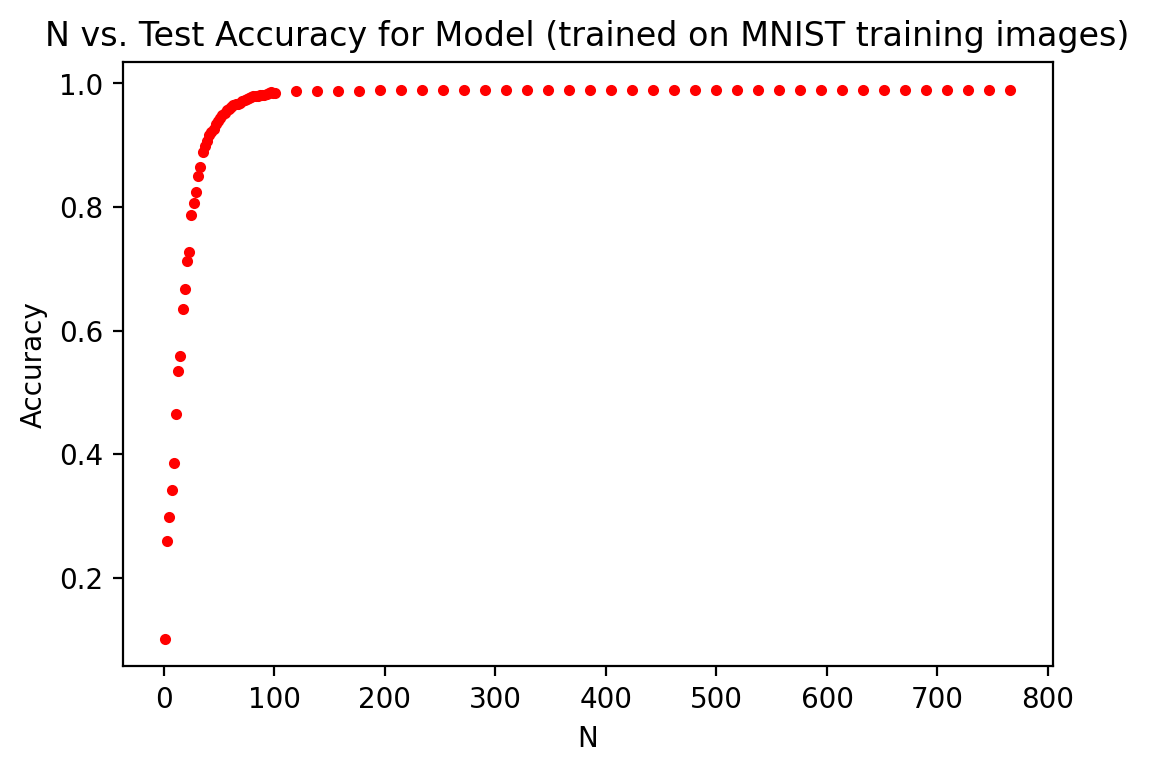

In [6]:
def images_new(N):
    '''Function that creates new images for the model to train /test
    based on N eigenvalues defined as a means of dimensionality reduction'''
    new_images = (np.dot(P_test[:,0:N],vecs.T[0:N,:]))+mu_test
    new_images = new_images.reshape(10000,28,28)
    return new_images

# Use smaller increments for lower values along the matrix where the
# eigenvalues are higher, eigenvalues further along contribute less
# and thus we can substantially increase the increments

N_array = np.append(np.arange(1,101,2),np.arange(101,785,19))

print(N_array)

# Set up plot

fig,ax = plt.subplots()

for N in N_array:
    new_data = images_new(N)
    
    # Reshape data to fit CNN
    
    reshape_test = np.reshape(new_data,(10000, 28,28, 1))
    test_loss, test_acc = model.evaluate(reshape_test, test_labels, verbose=2)
    ax.plot(N,test_acc,'r.')
    ax.set_xlabel("N")
    ax.set_ylabel("Accuracy")
    ax.set_title('N vs. Test Accuracy for Model (trained on MNIST training images)')

# Task 4.

Now using the 100-best PCA components make a new training dataset (using the 60,000 MNIST training images) and retrain your neural network from 1)

In [8]:
Q = np.dot(train_images_standard,vecs)

best100train_images = (np.dot(Q[:,0:100],vecs.T[0:100,:]))+mu_train
best100train_images = best100train_images.reshape(60000,28,28,1)

# Checking shape:
print(np.shape(best100train_images))

# Retraining network on new dataset:
history=model.fit(best100train_images, train_labels,batch_size=100, epochs=5)

(60000, 28, 28, 1)
Epoch 1/5
600/600 [==============================] - 10s 16ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 2/5
600/600 [==============================] - 10s 16ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 3/5
600/600 [==============================] - 10s 16ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 4/5
600/600 [==============================] - 10s 16ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 5/5
600/600 [==============================] - 10s 16ms/step - loss: 0.0012 - accuracy: 0.9998


# Task 5.

Repeat step 3 using your new neural network from 4)

313/313 - 1s - loss: 2.7164 - accuracy: 0.1458
313/313 - 1s - loss: 2.3894 - accuracy: 0.2885
313/313 - 1s - loss: 2.3888 - accuracy: 0.3715
313/313 - 1s - loss: 2.1952 - accuracy: 0.4533
313/313 - 1s - loss: 2.0548 - accuracy: 0.4856
313/313 - 1s - loss: 1.9162 - accuracy: 0.5475
313/313 - 1s - loss: 1.6080 - accuracy: 0.6331
313/313 - 1s - loss: 1.3699 - accuracy: 0.6773
313/313 - 1s - loss: 1.0111 - accuracy: 0.7606
313/313 - 1s - loss: 0.8909 - accuracy: 0.7901
313/313 - 1s - loss: 0.7642 - accuracy: 0.8206
313/313 - 1s - loss: 0.7121 - accuracy: 0.8380
313/313 - 1s - loss: 0.5263 - accuracy: 0.8745
313/313 - 1s - loss: 0.4590 - accuracy: 0.8914
313/313 - 1s - loss: 0.3954 - accuracy: 0.9087
313/313 - 1s - loss: 0.3304 - accuracy: 0.9222
313/313 - 1s - loss: 0.2955 - accuracy: 0.9291
313/313 - 1s - loss: 0.2200 - accuracy: 0.9445
313/313 - 1s - loss: 0.1952 - accuracy: 0.9497
313/313 - 1s - loss: 0.1778 - accuracy: 0.9536
313/313 - 1s - loss: 0.1563 - accuracy: 0.9603
313/313 - 1s 

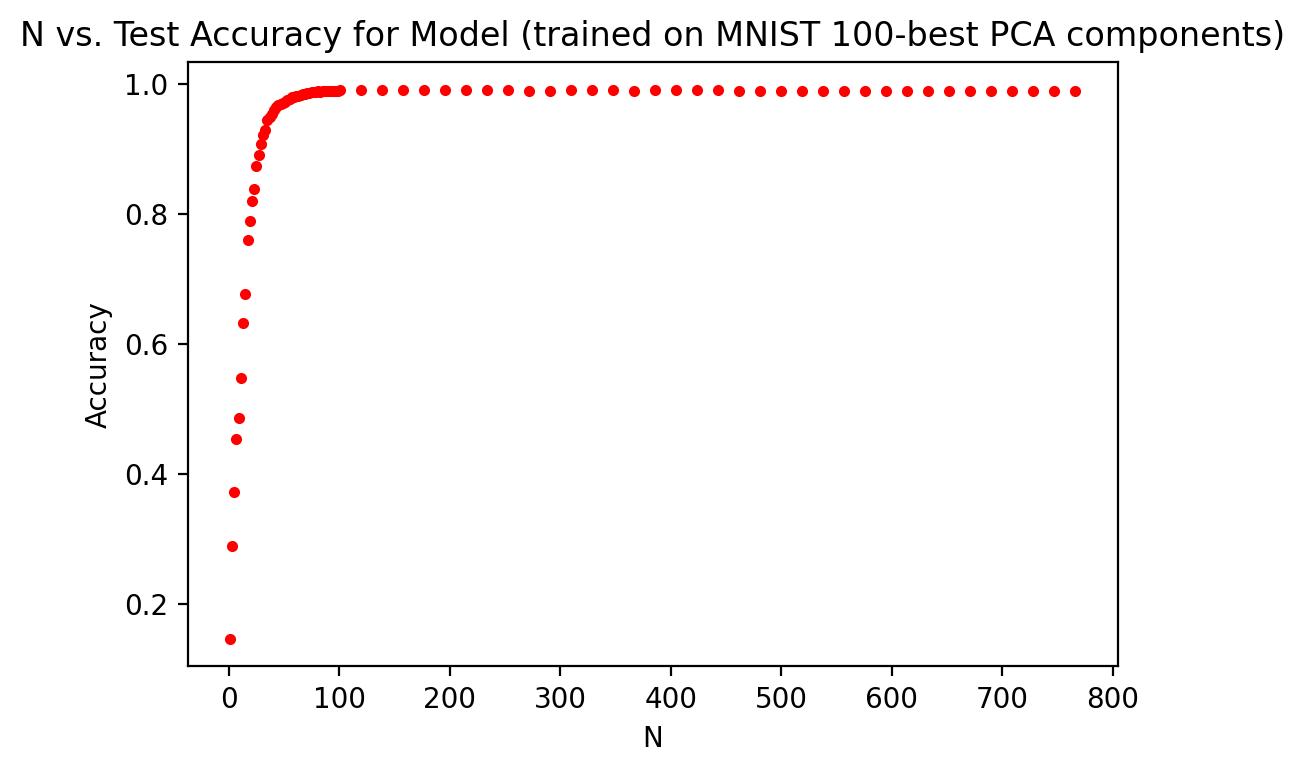

In [9]:
# Use smaller increments for lower values along the matrix where the
# eigenvalues are higher, eigenvalues further along contribute less
# and thus we can substantially increase the increments

N_array = np.append(np.arange(1,101,2),np.arange(101,785,19))

# Setting up a figure

fig,ax = plt.subplots()

for N in N_array:
    new_data = images_new(N)
    # Reshape data to fit CNN
    reshape_test = np.reshape(new_data,(10000, 28,28, 1))
    test_loss, test_acc = model.evaluate(reshape_test, test_labels, verbose=2)
    ax.plot(N,test_acc,'r.')
    ax.set_xlabel("N")
    ax.set_ylabel("Accuracy")
    ax.set_title('N vs. Test Accuracy for Model (trained on MNIST 100-best PCA components)')

# Task 6.

Finally repeat steps 4 and 5 using a network trained with the best 20 components

In [10]:
Q = np.dot(train_images_standard,vecs)

best20train_images = (np.dot(Q[:,0:20],vecs.T[0:20,:]))+mu_train
best20train_images = best20train_images.reshape(60000,28,28,1)

print(np.shape(best20train_images))

(60000, 28, 28, 1)


In [11]:
# Retraining network on new dataset:
history = model.fit(best20train_images, train_labels,batch_size=100, epochs=5)

Epoch 1/5
600/600 [==============================] - 10s 16ms/step - loss: 0.1402 - accuracy: 0.9573
Epoch 2/5
600/600 [==============================] - 10s 16ms/step - loss: 0.0796 - accuracy: 0.9755
Epoch 3/5
600/600 [==============================] - 10s 16ms/step - loss: 0.0632 - accuracy: 0.9796
Epoch 4/5
600/600 [==============================] - 10s 17ms/step - loss: 0.0523 - accuracy: 0.9829
Epoch 5/5
600/600 [==============================] - 10s 16ms/step - loss: 0.0452 - accuracy: 0.9851


313/313 - 1s - loss: 3.8271 - accuracy: 0.1041
313/313 - 1s - loss: 3.2388 - accuracy: 0.1824
313/313 - 1s - loss: 2.8553 - accuracy: 0.3050
313/313 - 1s - loss: 2.1834 - accuracy: 0.4472
313/313 - 1s - loss: 1.3447 - accuracy: 0.6043
313/313 - 1s - loss: 0.8614 - accuracy: 0.7257
313/313 - 1s - loss: 0.5395 - accuracy: 0.8388
313/313 - 1s - loss: 0.2891 - accuracy: 0.9129
313/313 - 1s - loss: 0.1814 - accuracy: 0.9455
313/313 - 1s - loss: 0.0982 - accuracy: 0.9703
313/313 - 1s - loss: 0.0831 - accuracy: 0.9763
313/313 - 1s - loss: 0.1031 - accuracy: 0.9711
313/313 - 1s - loss: 0.1017 - accuracy: 0.9705
313/313 - 1s - loss: 0.1035 - accuracy: 0.9711
313/313 - 1s - loss: 0.0984 - accuracy: 0.9726
313/313 - 1s - loss: 0.0974 - accuracy: 0.9727
313/313 - 1s - loss: 0.0999 - accuracy: 0.9740
313/313 - 1s - loss: 0.0942 - accuracy: 0.9759
313/313 - 1s - loss: 0.0900 - accuracy: 0.9753
313/313 - 1s - loss: 0.0846 - accuracy: 0.9778
313/313 - 1s - loss: 0.0879 - accuracy: 0.9778
313/313 - 1s 

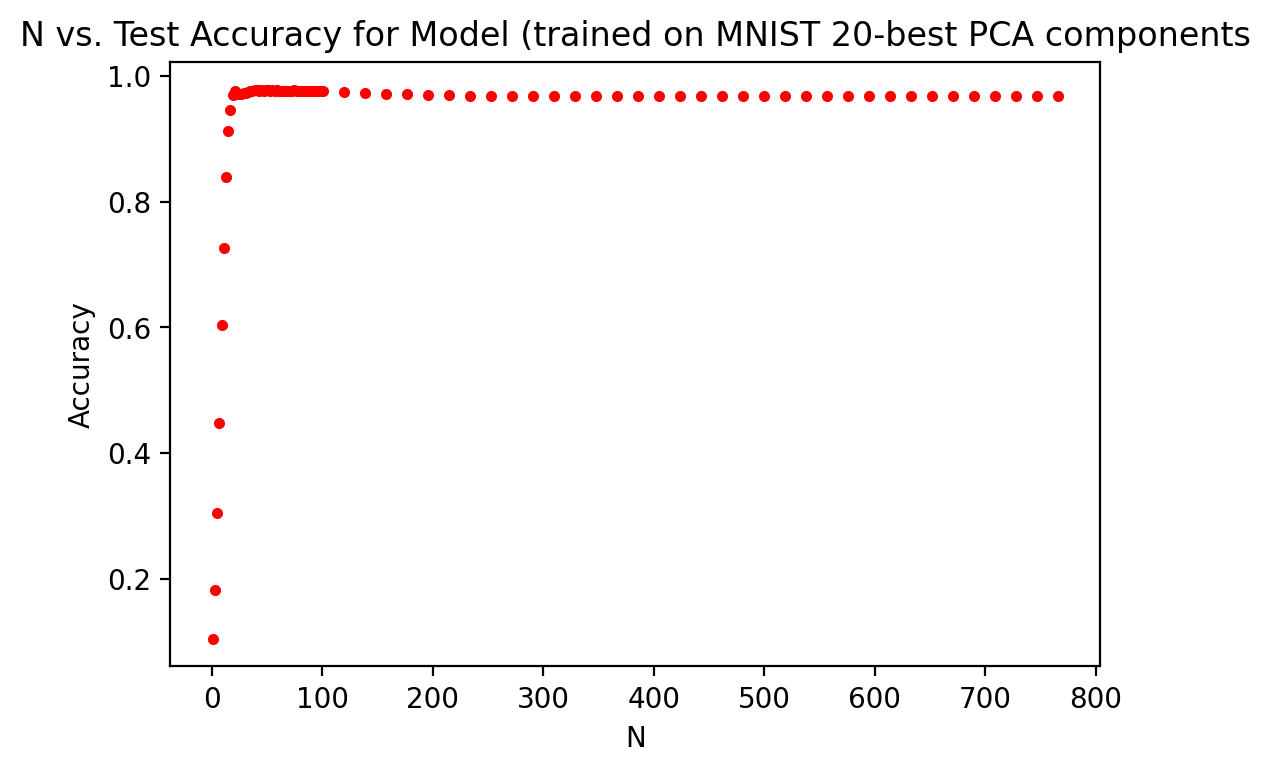

In [12]:
# Use smaller increments for lower values along the matrix where the
# eigenvalues are higher, eigenvalues further along contribute less
# and thus we can substantially increase the increments

N_array = np.append(np.arange(1,101,2),np.arange(101,785,19))

# Setting up a figure

fig,ax = plt.subplots()

for N in N_array:
    new_data = images_new(N)
    # Reshape data to fit CNN
    reshape_test = np.reshape(new_data,(10000, 28,28, 1))
    test_loss, test_acc = model.evaluate(reshape_test, test_labels, verbose=2)
    ax.plot(N,test_acc,'r.')
    ax.set_xlabel("N")
    ax.set_ylabel("Accuracy")
    ax.set_title('N vs. Test Accuracy for Model (trained on MNIST 20-best PCA components')